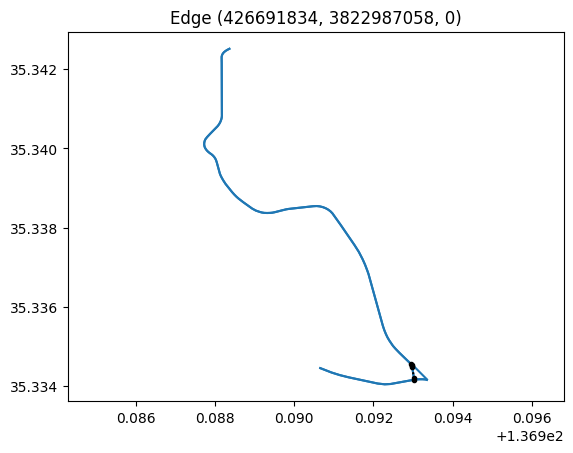

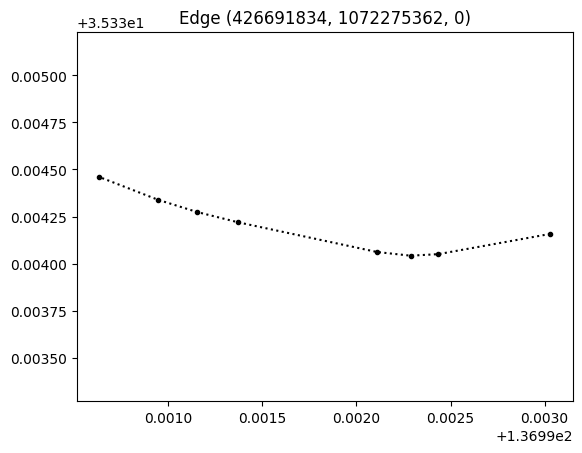

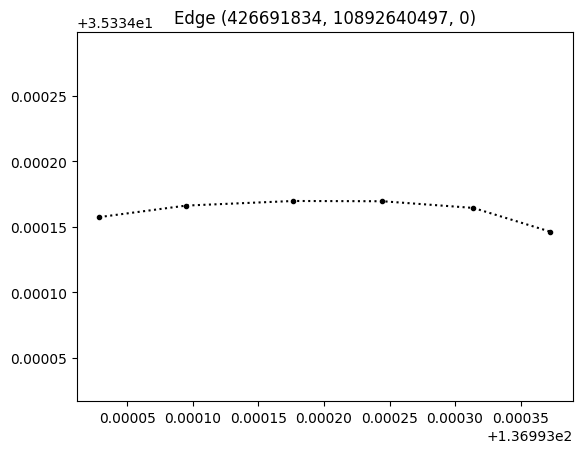

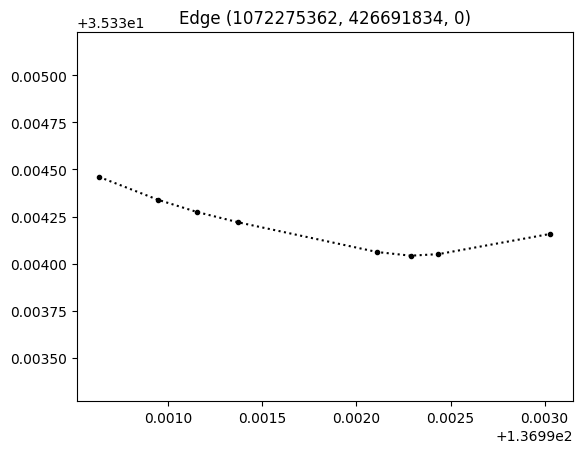

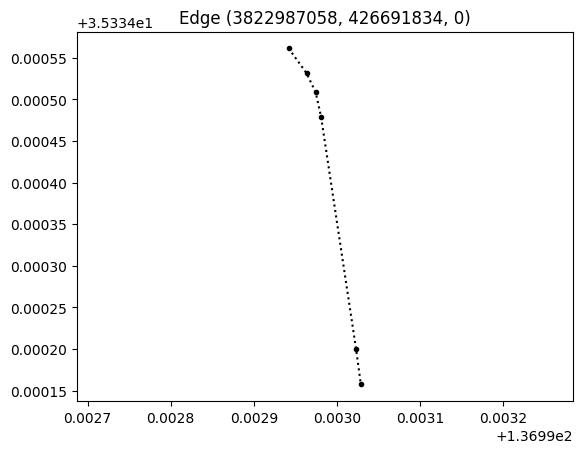

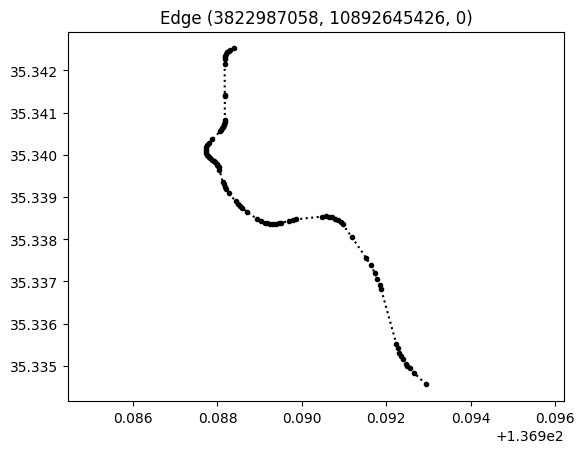

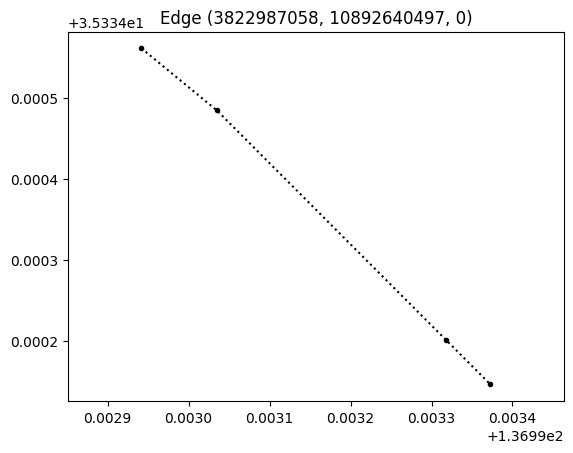

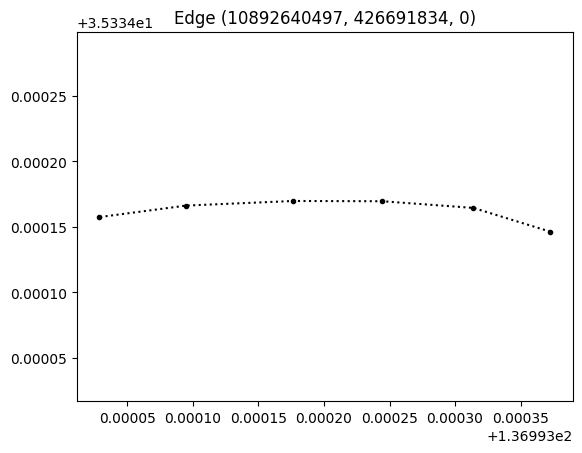

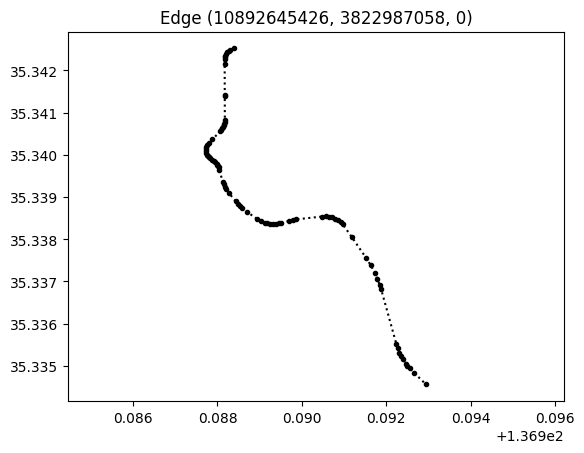

In [28]:

import osmnx as ox
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
pd.set_option('display.max_rows', None)

# 峠道
graph = ox.graph_from_point(center_point=(35.33456,136.98990)
                                , network_type='drive'
                                , dist=1000
                                , simplify=True
                                , custom_filter='["highway"~"tertiary|secondary|primary|trunk"]')

# グラフデータをGeoDataFrameに変換  
gdf_nodes = ox.graph_to_gdfs(graph, nodes=True, edges=True)
gdf_edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

# エッジの長さから評価する。
lower_bound_meter = 200
upper_bound_meter = 2000
gdf_edges['length_evaluation'] = np.where(gdf_edges['length'] <= lower_bound_meter, 0,
                                   np.where(gdf_edges['length'] >= upper_bound_meter, 1,
                                            (gdf_edges['length'] - lower_bound_meter) / (upper_bound_meter - lower_bound_meter)))

# 先頭のエッジを取得
# head_edge = gdf_edges.head()

# head_edge.plot()

gdf_edges
gdf_edges.plot()

# ジオメトリーのx座標点を抽出
for idx, row in gdf_edges.iterrows():
    x_coords = list(row['geometry'].coords.xy[0])
    y_coords = list(row['geometry'].coords.xy[1])
    # タイトルを設定
    plt.title('Edge {}'.format(idx))
    plt.plot(x_coords, y_coords, color="k", ls=":", marker=".") # 点列(x,y)を黒線で繋いだプロット
    # xとyの目盛りを等しくする
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.show() # プロットを表示

# plt.plot(x_coords, y_coords, color="k", ls=":", marker=".") # 点列(x,y)を黒線で繋いだプロット
# plt.show() # プロットを表示

# # Folium地図を作成
# m = folium.Map(location=[35.33456,136.98990], zoom_start=100)

# # エッジのジオメトリの座標点ごとにマーカーを描画
# for idx, row in head_edge.iterrows():
#     # エッジのジオメトリを取得
#     edge_coords = list(row['geometry'].coords)
    
#     # ジオメトリの座標点ごとにマーカーを描画
#     for coord in edge_coords:
#         folium.CircleMarker(location=[coord[1], coord[0]], radius=3, color='blue').add_to(m)

# # Folium地図を表示
# m
